In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Data Frame.
df = pd.read_csv('../../../resources/data/house_price_estimate.csv')
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14609,6762828349,42734,4,2.75,1810,7350,1.0,0,0,4,...,1980,0,122065,52.6003,-114.361,1750,7350,1,73,272000
14610,6762828783,42734,3,1.75,1350,7686,1.0,0,0,3,...,1987,0,122024,52.5917,-114.242,1370,7686,2,70,261000
14611,6762828856,42734,3,1.00,1180,5350,1.5,0,0,4,...,1959,0,122063,52.7350,-114.449,1490,5350,3,54,260000
14612,6762829600,42734,3,1.00,1400,10425,1.0,0,0,4,...,1968,0,122040,52.5038,-114.491,1440,10425,2,59,241500
14613,6762829669,42734,3,1.75,1590,7931,1.0,0,0,3,...,1979,0,122024,52.5928,-114.240,1680,7931,1,80,240000
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.00,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [ ]:
df.columns
## Each column represent a feature in the dataset. Len of 23.
## model a1x1+a2x2+a3x3+....+a22x22+b=Y
# Target Variable is 'Price'
# we need to predict the Price of the house based on other features (22+Bias). 

23

In [ ]:
### Classify the size of a cucumber based on its features.
## Assume total feateures are 5(length,weight,curvature,diameter,size,color).
## 100,250,0.2,5,small,green
## Size is target variable & categorical variable(small,medium,large).

## OneHotEncoding: Green-1,0,0 ; Yellow-0,1,0 ; White-0,0,1 -> 3 new columns will be added to the dataset.
## length,weight,curvature,diameter,size,Green,Yellow,White
## 100,250,0.2,5,small,1,0,0
## 100,250,0.2,5,small,0,0,1

## LabelEncoding: Green-0 ; Yellow-1 ; White-2 -> 1 new column will be added to the dataset.
## length,weight,curvature,diameter,size,color
## 100,250,0.2,5,small,0
## 100,250,0.2,5,small,2

In [ ]:
df.info()
## If you have any string or object type columns, you need to convert them to numerical using encoding techniques.
## like OneHotEncoding, LabelEncoding etc.,
## Cucumber - Green, Yellow, White, feature column = 1

## LabelEncoding: Green-0 ; Yellow-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [ ]:
df.isnull().sum()
### How to handle the missing values?
## 1. Remove the rows with missing values.(if the number of such rows are less)
## 2. Fill the missing values with mean/median/mode(for numerical columns).
## 3. Fill the missing values with most frequent value(for categorical columns).
## 4. Predict the missing values using ML models.(Advanced technique)
## 5. Use algorithms which can handle missing values.(like XGBoost, LightGBM etc.,)

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
## Example of predicting missing values using ML models.
# Here in this heart disease dataset, 'glucose' column has 388 missing values.
# male                 0
# age                  0
# education          105
# currentSmoker        0
# cigsPerDay          29
# BPMeds              53
# prevalentStroke      0
# prevalentHyp         0
# diabetes             0
# totChol             50
# sysBP                0
# diaBP                0
# BMI                 19
# heartRate            1
# glucose            388
# TenYearCHD           0
# dtype: int64
# I have to predict the missing values in the 'glucose' column.
# I will use a model and train it using the other columns as features and glucose(y) as target variable where glucose is not null.
# Then use that model to predict the missing glucose missing values.

/var/folders/6j/ctmcw2113bjcvj2rghs956sm0000gn/T/ipykernel_55776/942537134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Number of schools nearby',data=df,color='blue',palette='dark')


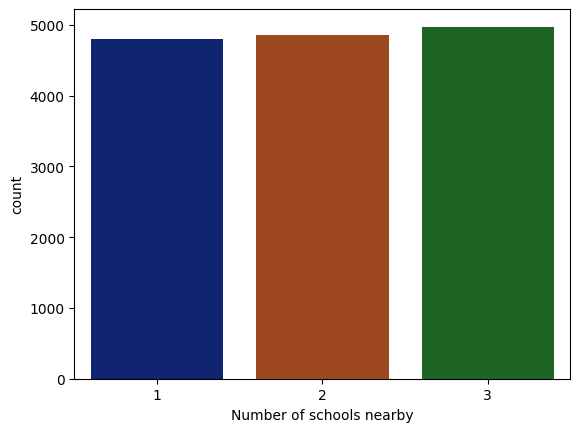

In [7]:
### Plotting  the Data
## Show different colors for different categories
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='Number of schools nearby',data=df,color='blue',palette='dark')
plt.show()

/var/folders/6j/ctmcw2113bjcvj2rghs956sm0000gn/T/ipykernel_55776/1610264228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price',data=df,color='green',palette='dark')


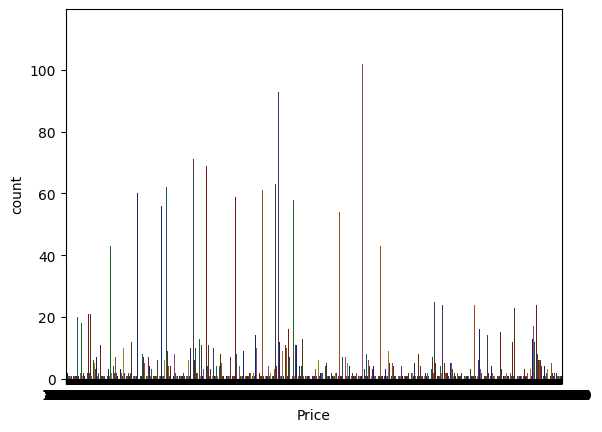

In [8]:
sns.countplot(x='Price',data=df,color='green',palette='dark')
plt.show()

/var/folders/6j/ctmcw2113bjcvj2rghs956sm0000gn/T/ipykernel_55776/3218715776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Date',data=df,color='green',palette='dark')


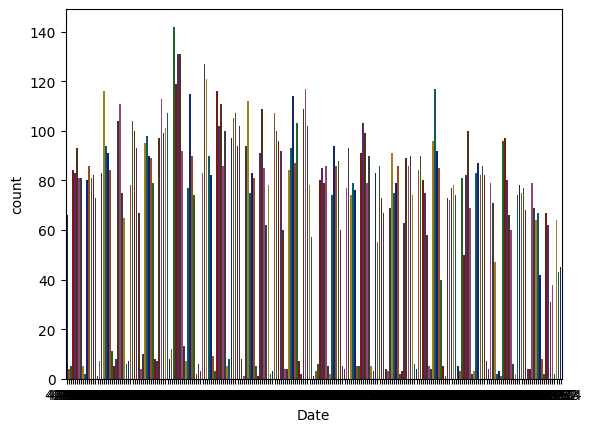

In [9]:
sns.countplot(x='Date',data=df,color='green',palette='dark')
plt.show()

/var/folders/6j/ctmcw2113bjcvj2rghs956sm0000gn/T/ipykernel_55776/1213597496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='number of views',data=df,color='green',palette='dark')


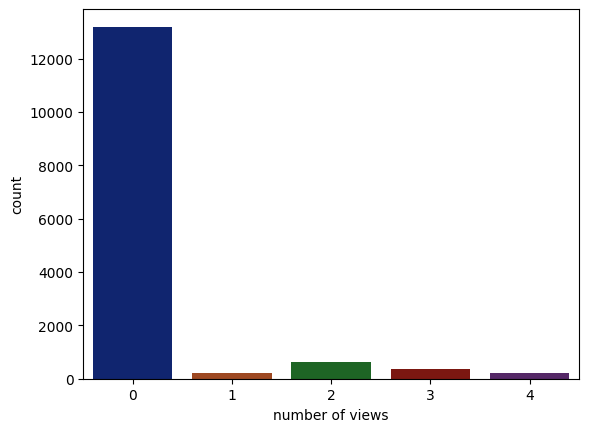

In [10]:
sns.countplot(x='number of views',data=df,color='green',palette='dark')
plt.show()

In [11]:
df.corr()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.045778,-0.328899,-0.516909,-0.648058,-0.100298,-0.312237,-0.112959,-0.292699,-0.044797,...,-0.068857,-0.109191,0.294579,-0.479325,-0.070978,-0.599844,-0.089646,-0.004823,-0.004633,-0.773268
Date,0.045778,1.000000,-0.015467,-0.026433,-0.021770,0.004374,-0.010230,0.011997,-0.004219,-0.027138,...,-0.006066,-0.011662,0.018064,-0.023270,-0.018359,-0.032353,-0.000082,-0.004073,0.011369,-0.027367
number of bedrooms,-0.328899,-0.015467,1.000000,0.509783,0.570441,0.034438,0.177208,-0.006247,0.078157,0.026326,...,0.153184,0.016159,-0.043978,-0.013226,0.135859,0.389765,0.029436,0.003399,-0.006066,0.308165
number of bathrooms,-0.516909,-0.026433,0.509783,1.000000,0.753540,0.080812,0.502912,0.060107,0.183780,-0.128335,...,0.498235,0.049676,-0.105504,0.031139,0.223950,0.570524,0.078637,0.002181,0.009232,0.532031
living area,-0.648058,-0.021770,0.570441,0.753540,1.000000,0.174455,0.354682,0.105858,0.287431,-0.063646,...,0.309856,0.059431,-0.080138,0.054464,0.240365,0.757540,0.180362,0.002372,0.002601,0.712276
lot area,-0.100298,0.004374,0.034438,0.080812,0.174455,1.000000,-0.004128,0.026281,0.078427,-0.008524,...,0.051602,0.006846,0.070120,-0.090978,0.221429,0.149766,0.706811,-0.012671,0.003283,0.082117
number of floors,-0.312237,-0.010230,0.177208,0.502912,0.354682,-0.004128,1.000000,0.016322,0.019860,-0.270136,...,0.481733,0.006719,-0.129704,0.050700,0.127627,0.285037,-0.010103,-0.007579,0.016617,0.262649
waterfront present,-0.112959,0.011997,-0.006247,0.060107,0.105858,0.026281,0.016322,1.000000,0.400567,0.018662,...,-0.024238,0.085863,0.038311,-0.021792,-0.047799,0.085755,0.032053,0.001563,0.001443,0.263943
number of views,-0.292699,-0.004219,0.078157,0.183780,0.287431,0.078427,0.019860,0.400567,1.000000,0.051791,...,-0.054839,0.103103,0.039834,-0.004734,-0.079411,0.281270,0.072455,0.008015,-0.001397,0.394954
condition of the house,-0.044797,-0.027138,0.026326,-0.128335,-0.063646,-0.008524,-0.270136,0.018662,0.051791,1.000000,...,-0.381554,-0.062103,0.045601,-0.003083,-0.121042,-0.099974,-0.004704,-0.006938,-0.002011,0.040609


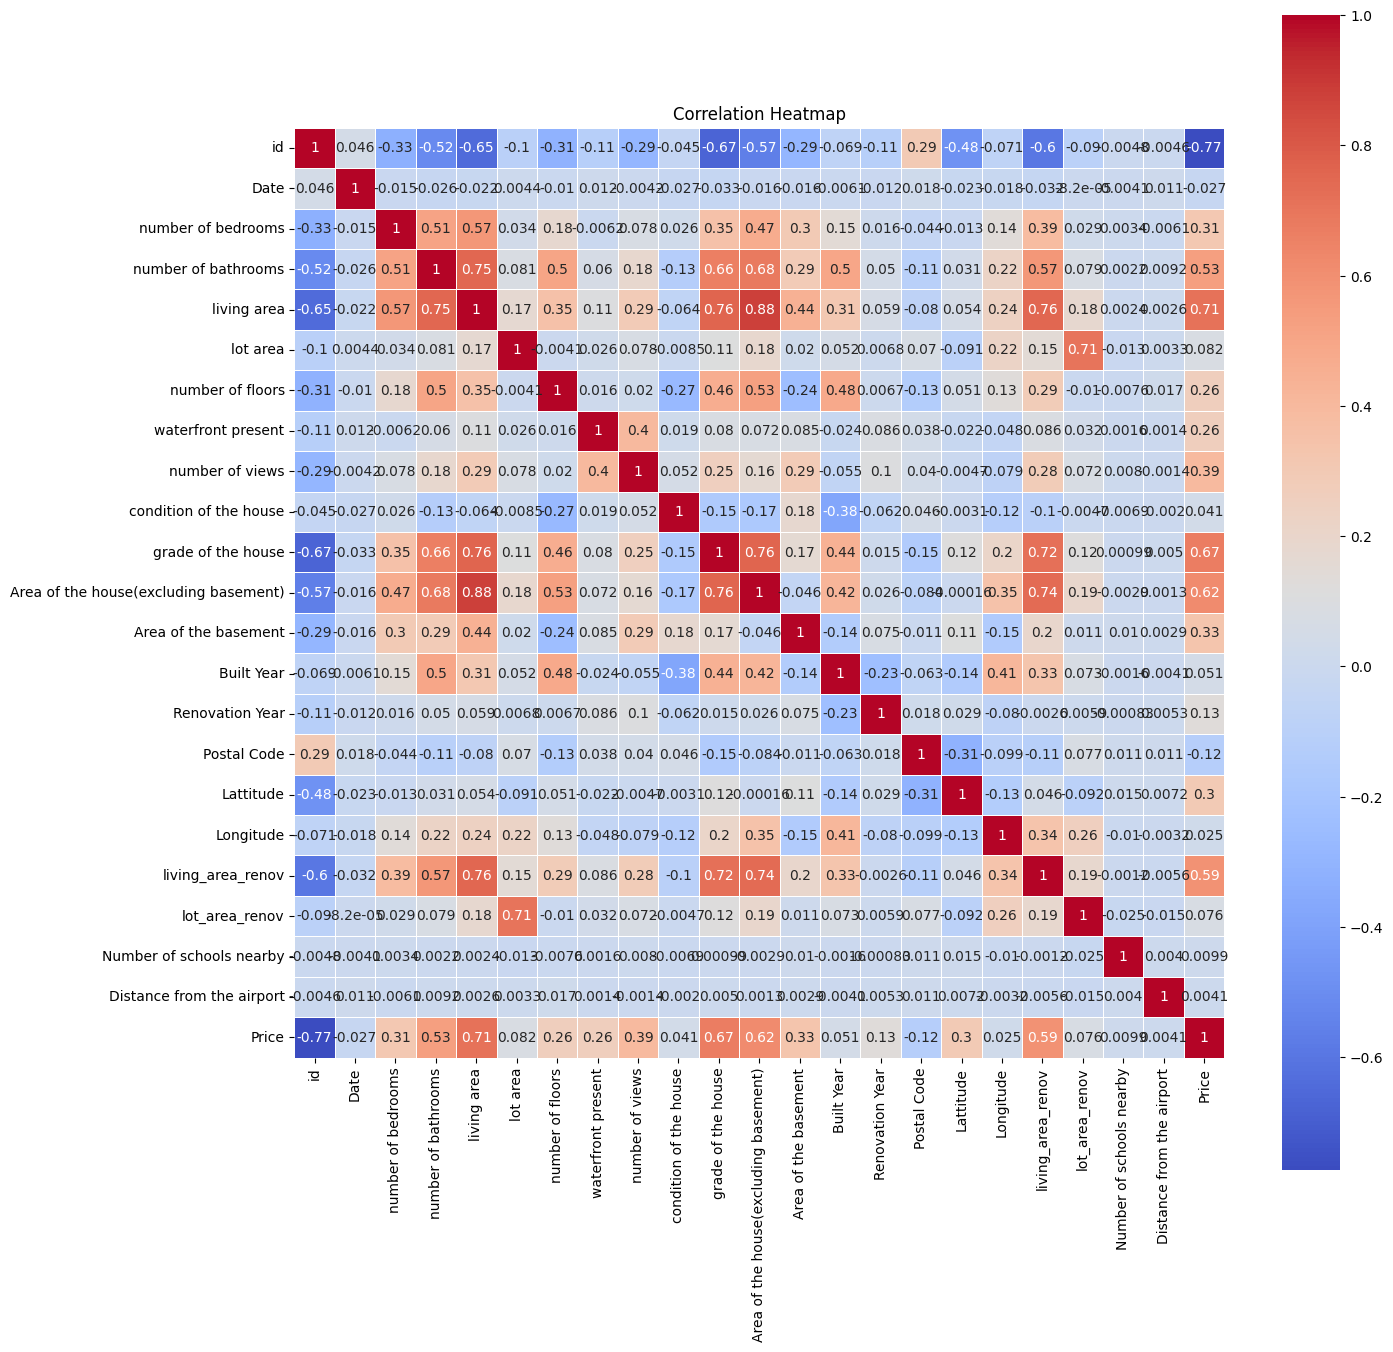

In [14]:
plt.figure(figsize=(15, 15))  # Adjust the size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# train_test_split 
from sklearn.model_selection import train_test_split
X = df.drop(['id','Price'], axis=1) # Independent Features
Y = df['Price']             # Target Variable
## Startify=y removed,we will come back.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

(11695, 21) (11695,)


In [ ]:
### Featuer Scaling
## https://www.geeksforgeeks.org/machine-learning/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
from sklearn.preprocessing import StandardScaler
# [-1,0,1] StandardScaler
# [0,1,2]  MinMaxScaler
# [0,0,1]  RobustScaler

# Identify numerical features that need scaling (excluding binary/ordinal where scaling might not be necessary)
numerical_features = X.columns.tolist()  # Adjust this list based on your dataset

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 44107941320.95641
R^2 Score: 0.7019654586300876


/Users/deepakkandalam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/deepakkandalam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/deepakkandalam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


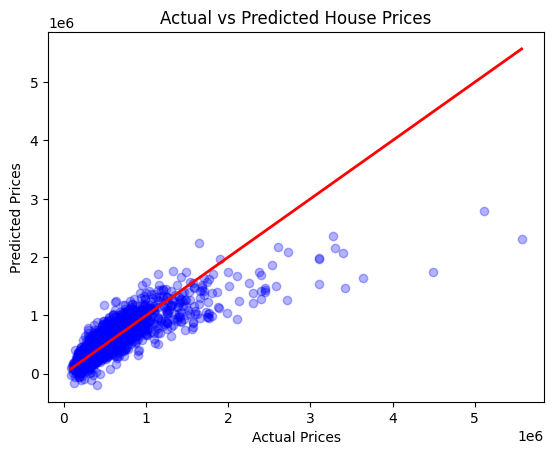

In [26]:
## Plot the Actual vs Predicted values
## Add the regression line
plt.scatter(y_test, y_pred, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()